#Predicting cab Booking cancellations

In [2]:
import pandas as pd
X=pd.read_csv("Kaggle_YourCabs_training.csv")
y = X.pop("Car_Cancellation")

The coloumn cost of error is droped which is to be predicted.

In [3]:
X.drop(["Cost_of_error"], axis=1, inplace=True)

In [4]:
X.head(5)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,132512,22177,28,NaN,2,83,448,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750
1,132513,21413,12,NaN,2,1010,540,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640
2,132514,22178,12,NaN,2,1301,1034,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766
3,132515,13034,12,NaN,2,768,398,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140
4,132517,22180,12,NaN,2,1365,849,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720


In [9]:
list(X.columns.values)

['id',
 'user_id',
 'vehicle_model_id',
 'package_id',
 'travel_type_id',
 'from_area_id',
 'to_area_id',
 'from_city_id',
 'to_city_id',
 'from_date',
 'to_date',
 'online_booking',
 'mobile_site_booking',
 'booking_created',
 'from_lat',
 'from_long',
 'to_lat',
 'to_long']



#Data fields that are used are:
booking ID
the ID of the passenger (based on phone number)
vehicle model type.
type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)
type of travel (1=long distance, 2= point to point, 3= hourly rental).
unique identifier of area. Applicable only for point-to-point travel and packages
unique identifier of area. Applicable only for point-to-point travel
unique identifier of city
unique identifier of city (only for intercity)
time stamp of requested trip start
time stamp of trip end
if booking was done on desktop website
if booking was done on mobile website
time stamp of booking
latitude of from area, - longitude of from area, - latitude of to area, - longitude of to area
whether the booking was cancelled (1) or not (0) due to unavailability of a car.
the cost incurred if the booking is misclassified. For an un-cancelled booking, the cost of misclassificaiton is 1. For a cancelled booking, the cost of misclassificaiton is 100 uniits.

In [4]:
X.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,25541.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,41507.974840,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,305.144945,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,25569.020830,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,41480.521110,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,41517.761550,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,41558.914630,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,41678.275680,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420


Numeric variables are taken by selecting only the variables which are not 'object' data types.

In [5]:
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long
0,132512,22177,28,NaN,2,83,448,NaN,NaN,NaN,0,0,12.924150,77.672290,12.927320,77.635750
1,132513,21413,12,NaN,2,1010,540,NaN,NaN,NaN,0,0,12.966910,77.749350,12.927680,77.626640
2,132514,22178,12,NaN,2,1301,1034,NaN,NaN,NaN,0,0,12.937222,77.626915,13.047926,77.597766
3,132515,13034,12,NaN,2,768,398,NaN,NaN,NaN,0,0,12.989990,77.553320,12.971430,77.639140
4,132517,22180,12,NaN,2,1365,849,NaN,NaN,NaN,0,0,12.845653,77.677925,12.954340,77.600720


MISING VALUES
missing values can be handled by replacing the 'NaN'values with 'Zero'.
so find out the coloums with missing values and fill them with 'Zero'.

In [6]:
null_col=['package_id', 'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'to_date', 'from_lat', 'from_long', 'to_lat', 'to_long']
for i in range(0, 10, 1):
    X[null_col[i]].fillna(0, inplace=True)

# Model creation
here i am using 'RandomForest classifier'
and i am gona split the data into train and test datasets respectively.

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
# Make train and test datasets
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X[numeric_variables], y, test_size=.2)

In [10]:
from sklearn.metrics import roc_auc_score

In [14]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=72)
model.fit(X_train, y_train)

roc = roc_auc_score(y_test, model.predict(X_test))
print "AUC: ", roc

AUC:  0.614680938714


not a bad AUC value for our dataset.
#ok lets build our model using both numerical and categorical coloumns

In [15]:
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [16]:
describe_categorical(X)

,from_date,booking_created
count,43431,43431
unique,20377,39349
top,10/12/2013 6:00,10/31/2013 10:30
freq,20,18


From the categorical variables we find two coloumns they are from_date and booking_created.so, if we see closely into the coloumnns each other there is a difference betwwen the from_date and booking_created which may effect the cab_cancellation.so we have to find the remainng days(the time the trip starts and the time when it is booked),so we craete a coloumn and add it to the X.

In [17]:
import datetime
days_rem=[]
for i in range(0, X.shape[0], 1):
    from_date=datetime.datetime.strptime(X.from_date.get_value(i), '%m/%d/%Y %H:%M')
    booking_date=datetime.datetime.strptime(X.booking_created.get_value(i), '%m/%d/%Y %H:%M')
    diff=from_date-booking_date
    days_rem.append(diff.days)

In [18]:
X['days_rem']=days_rem

in order to get better categories we are splitting the data variables into month,day and time

In [20]:
import time
def handle_date(x):
    '''takes date as input
    splits the date variable as day, month, year, hours 
    returns day, month and hour'''
    
    seconds= int(time.mktime(time.strptime(x, '%m/%d/%Y %H:%M'))) - time.timezone
    timeStamp=time.strftime("%a,%d %b %Y %H:%M:%S", time.gmtime(seconds))
    day, date=timeStamp.split(',')
    dd, mmm, yyyy, T= date.split(' ')
    hour, minut, sec = T.split(":")
    return day, mmm, hour

In [21]:
def split_date_col(date_col):
    '''takes each date column from data set 'X'
    calls "handle_date()" fn
    returns list of months, days and hours for corresponding date column'''
    
    months=[]
    days=[]
    hours=[]
    for i in range(0, X.shape[0], 1):
        d, m, s= handle_date(date_col.get_value(i))
        months.append(m)
        days.append(d)
        hours.append(s)
    return months, days, hours

In [22]:
#Splitting 'Date' columns into 3 different columns(month, day, time)
from_month, from_weekday, from_time= split_date_col(X.from_date)
booing_month, booking_weekday, booking_time=split_date_col(X.booking_created)

Add newly created columns by  splitting "from_date" into from_month, from_weekday, from_time

In [23]:
X['from_month']=from_month
X['from_weekday']=from_weekday
X['from_time']=from_time
X.drop(["from_date"], axis=1, inplace=True)

Add newly created columns by  splitting "booking_created" into booing_month, booking_weekday, booking_time

In [24]:
X['booking_month']=booing_month
X['booking_weekday']=booking_weekday
X['booking_time']=booking_time
X.drop(["booking_created"], axis=1, inplace=True)

Droping the variables that I don't feel like dealing with (id, user_id, to_date looks like worthless)

In [25]:
X.drop(["id", "user_id", "to_date"], axis=1, inplace=True)

In [26]:
categorical_variables = ['from_month', 'from_weekday', 'booking_month', 'booking_weekday', 'vehicle_model_id', 'package_id', 'travel_type_id', 'from_city_id', 'online_booking', 'mobile_site_booking', 'to_city_id']

for variable in categorical_variables:
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [27]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(X)

,from_area_id,to_area_id,from_lat,from_long,to_lat,to_long,days_rem,from_time,booking_time,from_month_Apr,from_month_Aug,from_month_Dec,from_month_Feb,from_month_Jan,from_month_Jul,from_month_Jun,from_month_Mar,from_month_May,from_month_Nov,from_month_Oct,from_month_Sep,from_weekday_Fri,from_weekday_Mon,from_weekday_Sat,from_weekday_Sun,from_weekday_Thu,from_weekday_Tue,from_weekday_Wed,booking_month_Apr,booking_month_Aug,booking_month_Feb,booking_month_Jan,booking_month_Jul,booking_month_Jun,booking_month_Mar,booking_month_May,booking_month_Nov,booking_month_Oct,booking_month_Sep,booking_weekday_Fri,booking_weekday_Mon,booking_weekday_Sat,booking_weekday_Sun,booking_weekday_Thu,booking_weekday_Tue,booking_weekday_Wed,vehicle_model_id_1,vehicle_model_id_10,vehicle_model_id_12,vehicle_model_id_13,vehicle_model_id_14,vehicle_model_id_17,vehicle_model_id_23,vehicle_model_id_24,vehicle_model_id_28,vehicle_model_id_30,vehicle_model_id_36,vehicle_model_id_39,vehicle_model_id_43,vehicle_model_id_54,vehicle_model_id_64,vehicle_model_id_65,vehicle_model_id_69,vehicle_model_id_70,vehicle_model_id_72,vehicle_model_id_75,vehicle_model_id_76,vehicle_model_id_85,vehicle_model_id_86,vehicle_model_id_87,vehicle_model_id_89,vehicle_model_id_90,vehicle_model_id_91,package_id_0.0,package_id_1.0,package_id_2.0,package_id_3.0,package_id_4.0,package_id_5.0,package_id_6.0,package_id_7.0,travel_type_id_1,travel_type_id_2,travel_type_id_3,from_city_id_0.0,from_city_id_1.0,from_city_id_15.0,from_city_id_31.0,online_booking_0,online_booking_1,mobile_site_booking_0,mobile_site_booking_1,to_city_id_0.0,to_city_id_4.0,to_city_id_5.0,to_city_id_8.0,to_city_id_10.0,to_city_id_11.0,to_city_id_12.0,to_city_id_13.0,to_city_id_14.0,to_city_id_16.0,to_city_id_17.0,to_city_id_18.0,to_city_id_20.0,to_city_id_23.0,to_city_id_24.0,to_city_id_25.0,to_city_id_28.0,to_city_id_29.0,to_city_id_30.0,to_city_id_31.0,to_city_id_32.0,to_city_id_36.0,to_city_id_37.0,to_city_id_41.0,to_city_id_42.0,to_city_id_44.0,to_city_id_45.0,to_city_id_48.0,to_city_id_49.0,to_city_id_50.0,to_city_id_51.0,to_city_id_52.0,to_city_id_53.0,to_city_id_55.0,to_city_id_56.0,to_city_id_57.0,to_city_id_58.0,to_city_id_60.0,to_city_id_61.0,to_city_id_62.0,to_city_id_64.0,to_city_id_65.0,to_city_id_66.0,to_city_id_67.0,to_city_id_68.0,to_city_id_69.0,to_city_id_72.0,to_city_id_75.0,to_city_id_76.0,to_city_id_77.0,to_city_id_80.0,to_city_id_82.0,to_city_id_85.0,to_city_id_88.0,to_city_id_89.0,to_city_id_94.0,to_city_id_97.0,to_city_id_108.0,to_city_id_109.0,to_city_id_110.0,to_city_id_111.0,to_city_id_113.0,to_city_id_114.0,to_city_id_115.0,to_city_id_116.0,to_city_id_119.0,to_city_id_120.0,to_city_id_121.0,to_city_id_125.0,to_city_id_126.0,to_city_id_131.0,to_city_id_132.0,to_city_id_133.0,to_city_id_134.0,to_city_id_135.0,to_city_id_137.0,to_city_id_139.0,to_city_id_142.0,to_city_id_144.0,to_city_id_146.0,to_city_id_147.0,to_city_id_148.0,to_city_id_149.0,to_city_id_151.0,to_city_id_152.0,to_city_id_154.0,to_city_id_157.0,to_city_id_160.0,to_city_id_161.0,to_city_id_162.0,to_city_id_163.0,to_city_id_164.0,to_city_id_165.0,to_city_id_166.0,to_city_id_167.0,to_city_id_168.0,to_city_id_169.0,to_city_id_170.0,to_city_id_172.0,to_city_id_173.0,to_city_id_176.0,to_city_id_178.0,to_city_id_179.0,to_city_id_182.0,to_city_id_184.0,to_city_id_185.0,to_city_id_186.0,to_city_id_187.0,to_city_id_189.0,to_city_id_190.0,to_city_id_191.0,to_city_id_192.0,to_city_id_196.0,to_city_id_197.0,to_city_id_198.0,to_city_id_200.0,to_city_id_203.0
0,83,448,12.924150,77.672290,12.927320,77.635750,0,02,01,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1010,540,12.966910,77.74935

In [28]:
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [30]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=72)
model.fit(X_train, y_train)

roc = roc_auc_score(y_test, model.predict(X_test))
print "AUC: ", roc

AUC:  0.605209446698


the AUC value is bit low and the parametters are confusing.Lets try a better model which we  learned in the class.

#Best model estimater
####Parameters to test are:
n_estimators: The number of trees in the forest.
max_features: The number of features to consider when looking for the best split.
min_samples_leaf: The minimum number of samples in newly created leaves.
n_jobs: Determines if multiple processors should be used to train and test the model.

In [31]:
from sklearn.grid_search import GridSearchCV
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [32]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [33]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
best_rfc = estimator.best_estimator_

In [37]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


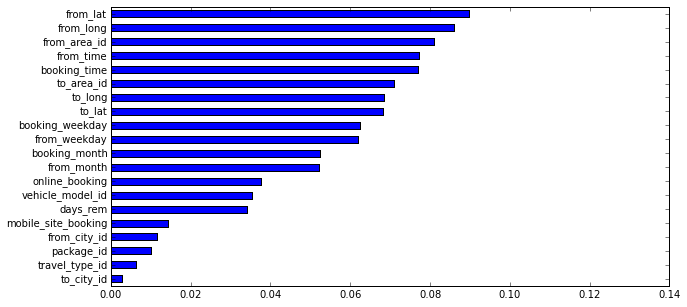

In [38]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = best_rfc.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, best_rfc.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(best_rfc, X.columns, summarized_columns=categorical_variables)

finding the bset AUC for the best_rfc

In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.939219523426


In [40]:
from sklearn.metrics import classification_report
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      8073
          1       0.76      0.21      0.32       614

avg / total       0.93      0.94      0.92      8687



1) Precision is the fraction of correctly identified examples of a class (ratio of true positives to all positives).
2) Recall is the fraction of observations classified in that class that was correctly classified.
Where high precision relates to a 'low false positive rate', and high recall relates to a 'low false negative rate'.
High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).


For this project:
The model will correctly identify 93% of cab cancellation. Conversely there is a 7% chance it will identify a non-cancelled booking as a cancelled booking. (tp / tp+fp)
out of the booking the model identified as cancelled, 94% of them will actually be cancelled. That is, our model 6% of the times may identify a cancelled booking as a non-cancelled booking. (tp / tp + fn)

In [41]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[8033   40]
 [ 488  126]]


From the confusion matrix above ite evident that 
true positve(tp)  =8033
false positve(fp) =40
false negitve(fn) =488

# cost of error
as we told earlier in stating of the problem
.fnx100=488x100=48800 units(cost of miss-classification as non-cancelled instead cancelled)
.fpx1  =40x1   =40 units   (cost of miss-classification as cancelled instead non-cancelled)

In [42]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.898546588923


thats pretty good score for our data set


#Following ROC curve is created by plotting the "true positive rate" against the "false positive rate".
ROC curve, is a graphical plot that explains the performance of a binary classifier system

In [45]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


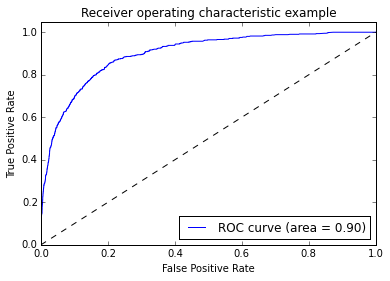

In [46]:
from sklearn.metrics import roc_curve
import math

fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Model  output
accuracy                 = 0.93
precision and recall     = 0.93 and 0.94 respectively
AUC(area under the curve)= 0.90

but we have done it 20% of our model,we can't trust it for rest of the data.so the model may overfit to the data.In order to overcome this problem we use 'Validation'technique.which we studied in the last classes.


#K-Fold Cross Validation
Split the data into K chunks
Train K models, retain a chunk for testing and use the other K-1 chunks for training.
The result is K scores, which can be combined into a single average score for the model

In [48]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, X, y, cv=10)

In [49]:
scores

array([ 0.92771639,  0.91183241,  0.25650472,  0.72139074,  0.8823394 ,
        0.91733825,  0.90997007,  0.89201013,  0.85355745,  0.39336711])

In [50]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent could happen between %f and %f' 

Score is 0.766603 +/-  0.164452
95 percent could happen between %f and %f


# Result 
when we take the 2o%of the dataset the AUC score is 0.898,but after using K-fold cross valiation we can see that our model is over fitting

by using K-fold the actual AUC is between 0.6023 and 0.9312.So the average AUC score is  0.7667